## Wine Clustering

**Proposta:** Aplicar algoritmos de clusterização para identificar os diferentes tipos de vinho presentes no dataset a partir de sua composição química.

**Link do Kaggle:** https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score



In [2]:
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [4]:
df = pd.read_csv('/content/drive/MyDrive/CursoML/WineClustering/wine-clustering.csv',
                    sep=',', encoding='iso-8859-1')

### Exploração dos Dados

In [5]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df.shape

(178, 13)

In [7]:
df.dtypes

,0
Alcohol,float64
Malic_Acid,float64
Ash,float64
Ash_Alcanity,float64
Magnesium,int64
Total_Phenols,float64
Flavanoids,float64
Nonflavanoid_Phenols,float64
Proanthocyanins,float64
Color_Intensity,float64


In [8]:
df.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [9]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
boxplot = px.box(df, y="Proline")
boxplot.show()

Têm alguns outliers: Malic_Acid, Ash, Ash_Alcanity, Magnesium, Proanthocyanins, Color_Intensity, Hue.

### Pré-processamento

**Escalonamento**

In [14]:
escala = StandardScaler()
df_esc = escala.fit_transform(df)

In [15]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [16]:
df_esc

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

### K-Means com PCA

In [17]:
pca = PCA(n_components = 2)

In [18]:
df_pca = pca.fit_transform(df_esc)

In [19]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

Elbow Method

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

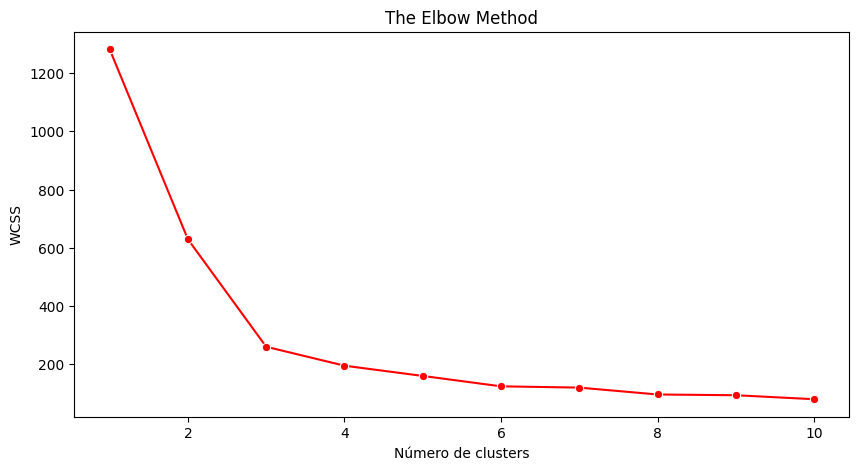

In [21]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

In [22]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5, max_iter = 300)


In [23]:
kmeans2 = kmeans.fit(df_pca)

In [24]:
centroides = kmeans2.cluster_centers_

In [25]:
classificacao1 = kmeans2.labels_
classificacao1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [26]:
graf1 = px.scatter(x = df_pca[:,0], y = df_pca[:,1], color=classificacao1)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means com PCA')
graf3.update_xaxes(title = 'Componente 1')
graf3.update_yaxes(title = 'Componente 2')
graf3.show()

In [27]:
agrupamento1 = pd.DataFrame(classificacao1, columns = ['Grupo'])
agrupamento1

,Grupo
0,0
1,0
2,0
3,0
4,0
...,...
173,1
174,1
175,1
176,1


In [28]:
df2 = pd.concat([df,agrupamento1],axis=1)
df2

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Grupo
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [29]:
grupo0 = df2.loc[df2['Grupo'] == 0]
grupo1 = df2.loc[df2['Grupo'] == 1]
grupo2 = df2.loc[df2['Grupo'] == 2]

In [30]:
grupo0.shape

(61, 14)

In [31]:
grupo1.shape

(50, 14)

In [32]:
grupo2.shape

(67, 14)

In [33]:
sil1 = silhouette_score(df_pca, classificacao1)
dbi1 = davies_bouldin_score(df_pca, classificacao1)
chi1 = calinski_harabasz_score(df_pca, classificacao1)

print("Silhouette:", sil1, "DBI:", dbi1, "CHI:", chi1)

Silhouette: 0.5601697480957203 DBI: 0.5977226208167409 CHI: 343.94920956363967


In [34]:
resultados = []
resultados.append(["KMeans", "Sim", 3, sil1, dbi1, chi1])

### K-Means com todos os atributos

In [35]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df_esc)
    wcss.append(kmeans.inertia_)

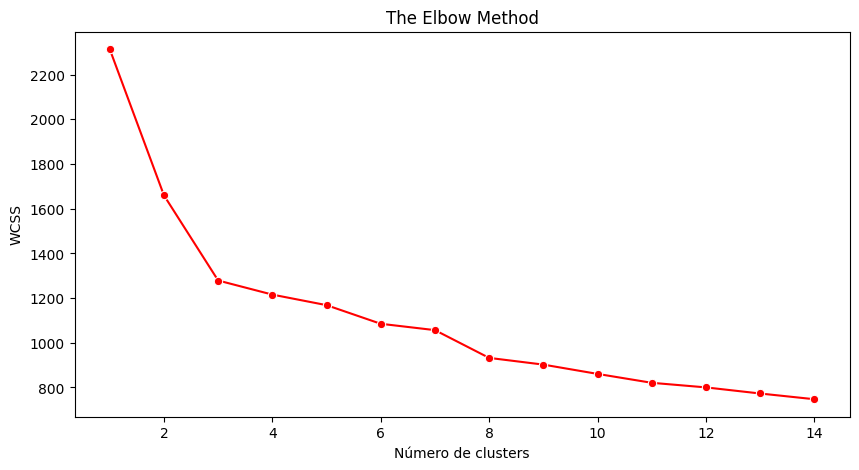

In [36]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 15), y=wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

In [37]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5, max_iter = 300)

In [38]:
kmeans3 = kmeans.fit(df_esc)

In [39]:
centroides = kmeans3.cluster_centers_
centroides

array([[ 0.87809728, -0.30457633,  0.31894179, -0.66452366,  0.56488825,
         0.87650546,  0.94363903, -0.58558981,  0.58178294,  0.16718842,
         0.48372814,  0.76705349,  1.15834713],
       [-0.93900326, -0.39196582, -0.43920097,  0.20898793, -0.46377382,
        -0.05334831,  0.06690377, -0.01982215,  0.06479192, -0.88207529,
         0.45298189,  0.28973833, -0.75602559],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796]])

In [40]:
classificacao2 = kmeans3.labels_
classificacao2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [41]:
agrupamento2 = pd.DataFrame(classificacao2, columns = ['Grupo'])

In [42]:
df3 = pd.concat([df,agrupamento2],axis=1)
df3

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Grupo
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [43]:
grupo0 = df3.loc[df3.Grupo == 0]
grupo1 = df3.loc[df3.Grupo == 1]
grupo2 = df3.loc[df3.Grupo == 2]

In [44]:
grupo0.shape

(61, 14)

In [45]:
grupo1.shape

(66, 14)

In [46]:
grupo2.shape

(51, 14)

In [47]:
sil2 = silhouette_score(df_esc, classificacao2)
dbi2 = davies_bouldin_score(df_esc, classificacao2)
chi2 = calinski_harabasz_score(df_esc, classificacao2)

print("Silhouette:", sil2, "DBI:", dbi2, "CHI:", chi2)

Silhouette: 0.28594199657074876 DBI: 1.391793832317738 CHI: 70.83688657175371


In [48]:
resultados.append(["KMeans", "Não", 3, sil2, dbi2, chi2])

### Agrupamento Hierárquico com PCA

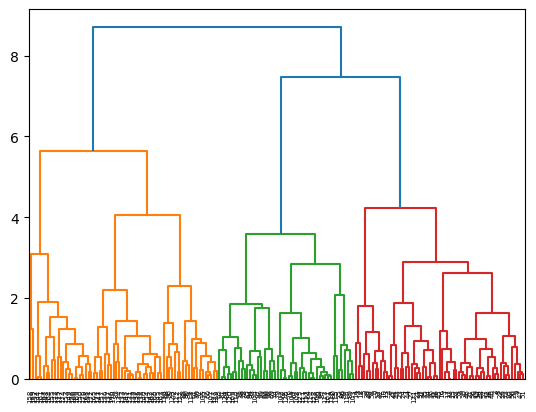

In [49]:
dendrograma = dendrogram(linkage(df_pca, method = 'complete'))

In [50]:
hier = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage = 'complete')
classificacao3 = hier.fit_predict(df_pca)

In [51]:
classificacao3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [52]:
graf = px.scatter(x = df_pca[:,0], y = df_pca[:,1], color=classificacao3)
graf.update_layout(width=800,height=500,title_text='Agrupamento Hierárquico')
graf.show()

In [53]:
agrupamento3 = pd.DataFrame(classificacao3, columns = ['Grupo'])

In [54]:
df4 = pd.concat([df,agrupamento3],axis=1)
df4

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Grupo
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [55]:
grupo0 = df4.loc[df4.Grupo == 0]
grupo1 = df4.loc[df4.Grupo == 1]
grupo2 = df4.loc[df4.Grupo == 2]

In [56]:
grupo0.shape

(68, 14)

In [57]:
grupo1.shape

(61, 14)

In [58]:
grupo2.shape

(49, 14)

In [59]:
sil3 = silhouette_score(df_pca, classificacao3)
dbi3 = davies_bouldin_score(df_pca, classificacao3)
chi3 = calinski_harabasz_score(df_pca, classificacao3)

print("Silhouette:", sil3, "DBI:", dbi3, "CHI:", chi3)

Silhouette: 0.5135476900345354 DBI: 0.6268401506869252 CHI: 277.3540471329344


In [60]:
resultados.append(["Hierárquico", "Sim", 3, sil3, dbi3, chi3])

### Agrupamento hierárquico com todos os atributos

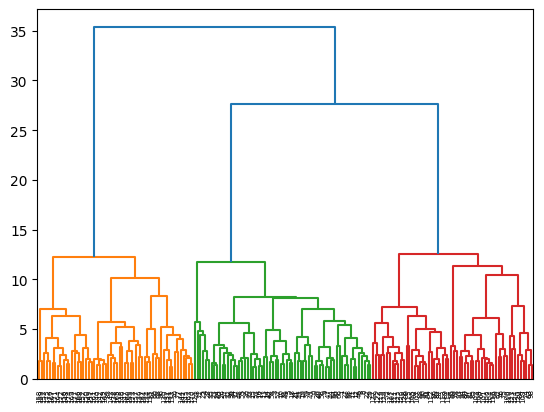

In [61]:
dendrograma = dendrogram(linkage(df_esc, method = 'ward'))

In [62]:
hier = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage = 'ward')
classificacao4 = hier.fit_predict(df_esc)

In [63]:
classificacao4

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [64]:
agrupamento4 = pd.DataFrame(classificacao4, columns = ['Grupo'])

In [65]:
df5 = pd.concat([df,agrupamento4],axis=1)

In [66]:
grupo0 = df5.loc[df5.Grupo == 0]
grupo1 = df5.loc[df5.Grupo == 1]
grupo2 = df5.loc[df5.Grupo == 2]

In [67]:
grupo0.shape

(58, 14)

In [68]:
grupo1.shape

(56, 14)

In [69]:
grupo2.shape

(64, 14)

In [70]:
sil4 = silhouette_score(df_esc, classificacao4)
dbi4 = davies_bouldin_score(df_esc, classificacao4)
chi4 = calinski_harabasz_score(df_esc, classificacao4)

print("Silhouette:", sil4, "DBI:", dbi4, "CHI:", chi4)

Silhouette: 0.2774439826952265 DBI: 1.4185919431857326 CHI: 67.6474675044098


In [71]:
resultados.append(["Hierárquico", "Não", 3, sil4, dbi4, chi4])

### DBSCAN com PCA

In [72]:
dbscan = DBSCAN(eps = 0.53, min_samples=4)
dbscan.fit(df_pca)

DBSCAN(eps=0.53, min_samples=4)

In [73]:
classificacao5 = dbscan.labels_
classificacao5

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,  1,  0,  0,  1,
       -1,  0,  1,  0, -1,  0,  0,  1,  1,  1,  0,  0, -1,  0,  1,  2,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0, -1,  1,  0,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  0,  0,  1, -1,  0,  1,  0,  1,  1,  1, -1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2, -1,
        2,  2, -1,  2,  2, -1, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,
       -1,  2,  2,  2,  2,  2,  2, -1])

In [74]:
graf = px.scatter(x = df_pca[:,0], y = df_pca[:,1], color=classificacao5)
graf.update_layout(width=800,height=500,title_text='Agrupamento DBSCAN')
graf.show()

In [75]:
agrupamento5 = pd.DataFrame(classificacao5, columns = ['Grupo'])
agrupamento5

,Grupo
0,0
1,0
2,0
3,-1
4,0
...,...
173,2
174,2
175,2
176,2


In [76]:
df6 = pd.concat([df, agrupamento5],axis=1)

In [77]:
grupo0 = df6.loc[df6.Grupo == 0]
grupo1 = df6.loc[df6.Grupo == 1]
grupo2 = df6.loc[df6.Grupo == 2]

In [78]:
grupo0.shape

(75, 14)

In [79]:
grupo1.shape

(42, 14)

In [80]:
grupo2.shape

(40, 14)

In [81]:
sil5 = silhouette_score(df_pca, classificacao5)
dbi5 = davies_bouldin_score(df_pca, classificacao5)
chi5 = calinski_harabasz_score(df_pca, classificacao5)

print("Silhouette:", sil5, "DBI:", dbi5, "CHI:", chi5)

Silhouette: 0.3971145734569241 DBI: 1.5689506939317404 CHI: 117.19383581481642


In [82]:
resultados.append(["DBSCAN", "Sim", 3, sil5, dbi5, chi5])

### DBSCAN com todos os atributos

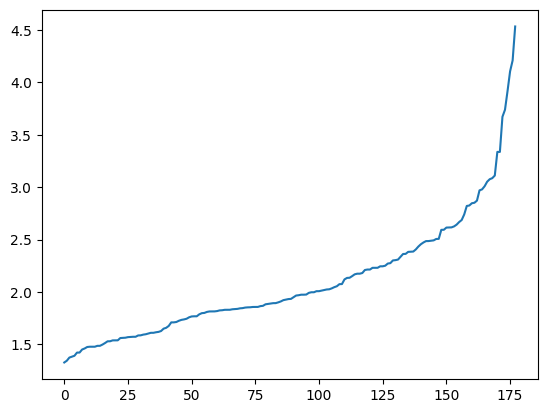

In [83]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(df_esc)
distances, indices = neighbors_fit.kneighbors(df_esc)

distances = np.sort(distances[:,2])
plt.plot(distances)
plt.show()

In [84]:
dbscan = DBSCAN(eps = 2.16, min_samples=3)
dbscan.fit(df_esc)

DBSCAN(eps=2.16, min_samples=3)

In [85]:
classificacao6 = dbscan.labels_
classificacao6

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0, -1, -1,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,  0,  0, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0,  0,  0,  2,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0, -1, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0,  0, -1,
        0,  0, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1,  2,  2,  2,  2,  2,
       -1, -1,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2, -1,
        2,  2,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2])

In [86]:
agrupamento6 = pd.DataFrame(classificacao6, columns = ['Grupo'])


In [87]:
df7 = pd.concat([df,agrupamento6],axis=1)

In [88]:
grupo0 = df7.loc[df7.Grupo == 0]
grupo1 = df7.loc[df7.Grupo == 1]
grupo2 = df7.loc[df7.Grupo == 2]

In [89]:
grupo0.shape

(88, 14)

In [90]:
grupo1.shape

(3, 14)

In [91]:
grupo2.shape

(40, 14)

In [92]:
sil6 = silhouette_score(df_esc, classificacao6)
dbi6 = davies_bouldin_score(df_esc, classificacao6)
chi6 = calinski_harabasz_score(df_esc, classificacao6)

print("Silhouette:", sil6, "DBI:", dbi6, "CHI:", chi6)

Silhouette: -0.006880573540028828 DBI: 3.245613490310057 CHI: 18.646665516977833


In [93]:
resultados.append(["DBSCAN", "Não", 3, sil6, dbi6, chi6])

### MeanShift com PCA

In [94]:
mean = MeanShift(bandwidth=1.3, cluster_all=True)

In [95]:
mean.fit(df_pca)

MeanShift(bandwidth=1.3)

In [96]:
classificacao7 = mean.labels_
classificacao7

array([0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 1, 3,
       3, 1, 1, 3, 1, 3, 1, 0, 3, 1, 1, 1, 3, 3, 1, 3, 1, 2, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 0, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [97]:
agrupamento7 = pd.DataFrame(classificacao7, columns = ['Grupo'])

In [98]:
df8 = pd.concat([df,agrupamento7],axis=1)

In [99]:
grupo0 = df8.loc[df8.Grupo == 0]
grupo1 = df8.loc[df8.Grupo == 1]
grupo2 = df8.loc[df8.Grupo == 2]
grupo3 = df8.loc[df8.Grupo == 3]

In [100]:
grupo0.shape

(56, 14)

In [101]:
grupo1.shape

(46, 14)

In [102]:
grupo2.shape

(49, 14)

In [103]:
grupo3.shape

(27, 14)

In [104]:
sil7 = silhouette_score(df_pca, classificacao7)
dbi7 = davies_bouldin_score(df_pca, classificacao7)
chi7 = calinski_harabasz_score(df_pca, classificacao7)

print("Silhouette:", sil7, "DBI:", dbi7, "CHI:", chi7)

Silhouette: 0.49012762725053777 DBI: 0.7196923438601047 CHI: 323.3605362868402


In [105]:
resultados.append(["MeanShift", "Sim", 4, sil7, dbi7, chi7])

### MeanShift com todos os atributos

In [106]:
mean = MeanShift(bandwidth=3.6, cluster_all=True)

In [107]:
mean.fit(df_esc)

MeanShift(bandwidth=3.6)

In [108]:
classificacao8 = mean.labels_
classificacao8

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 0, 0, 3, 0, 4, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 5, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [109]:
agrupamento8 = pd.DataFrame(classificacao8, columns = ['Grupo'])

In [110]:
df9 = pd.concat([df,agrupamento8],axis=1)

In [111]:
grupo0 = df9.loc[df9.Grupo == 0]
grupo1 = df9.loc[df9.Grupo == 1]
grupo2 = df9.loc[df9.Grupo == 2]
grupo3 = df9.loc[df9.Grupo == 3]
grupo4 = df9.loc[df9.Grupo == 4]
grupo5 = df9.loc[df9.Grupo == 5]

In [112]:
grupo0.shape

(103, 14)

In [113]:
grupo1.shape

(66, 14)

In [114]:
grupo2.shape

(4, 14)

In [115]:
grupo3.shape

(1, 14)

In [116]:
grupo4.shape

(2, 14)

In [117]:
grupo5.shape

(2, 14)

In [118]:
sil8 = silhouette_score(df_esc, classificacao8)
dbi8 = davies_bouldin_score(df_esc, classificacao8)
chi8 = calinski_harabasz_score(df_esc, classificacao8)

print("Silhouette:", sil8, "DBI:", dbi8, "CHI:", chi8)

Silhouette: 0.19955319989330897 DBI: 1.0989303156368593 CHI: 19.70218098095268


In [119]:
resultados.append(["MeanShift", "Não", 6, sil8, dbi8, chi8])

### Tabela comparativa

In [120]:
tabela = pd.DataFrame(resultados, columns=["Algoritmo", "PCA", "#Clusters", "Silhouette", "DBI", "CHI"])
tabela

,Algoritmo,PCA,#Clusters,Silhouette,DBI,CHI
0,KMeans,Sim,3,0.560170,0.597723,343.949210
1,KMeans,Não,3,0.285942,1.391794,70.836887
2,Hierárquico,Sim,3,0.513548,0.626840,277.354047
3,Hierárquico,Não,3,0.277444,1.418592,67.647468
4,DBSCAN,Sim,3,0.397115,1.568951,117.193836
5,DBSCAN,Não,3,-0.006881,3.245613,18.646666
6,MeanShift,Sim,4,0.490128,0.719692,323.360536
7,MeanShift,Não,6,0.199553,1.098930,19.702181
